# Bayesian Statistics

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np
import pandas as pd
import scipy.stats

## <span style="color:Orange">Types of Probability</span>

We construct a probability space by assigning a numerical probability in the range $[0,1]$ to sets of outcomes (events) in some space.

When outcomes are the result of an uncertain but <span style="color:violet">repeatable</span> process, probabilities can always be measured to arbitrary accuracy by simply observing many repetitions of the process and calculating the frequency at which each event occurs. 

The frequentist interpretation of probability is the long-run frequency of repeatable experiments. For example, saying that the probability of a coin landing heads being 0.5 means that if we were to flip the coin enough times, we would see heads 50% of the time.

These <span style="color:violet">frequentist probabilities</span> have an appealing objective reality to them. However, you cannot define a probability for events that are not repeatable. For instance, before the 2018 FIFA world cup, let’s say that you read somewhere that Brazil’s probability of winning the tournament was 14%. This probability cannot really be explained with a purely frequentist interpretation, because the experiment is not repeatable! The 2018 world cup is only going to happen once, and it’s impossible to repeat the exact experiment with the same exact conditions, players and preceding events.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">DISCUSS</span>___: How might you assign a frequentist probability to statements like:
 - The electron spin is 1/2.

 - The Higgs boson mass is between 124 and 126 GeV.

 - The fraction of dark energy in the universe today is between 68% and 70%.

 - The superconductor $\text{Hg}\text{Ba}_2\text{Ca}_2\text{Cu}_3\text{O}_{8+δ}$ (Hg-1223) has a critical temperature above $130 K$.

You cannot (if we assume that these are universal constants), since that would require a measurable process whose outcomes had different values for a universal constant.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

The inevitable conclusion is that the statements we are most interested in cannot be assigned frequentist probabilities.

However, if we allow probabilities to also measure your subjective "degree of belief" in a statement, then we can use the full machinery of probability theory to discuss more interesting statements.  These are called <span style="color:violet">Bayesian probabiilities</span>.

As usual, an XKCD comic captures the essence of the situation:

<div>
<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Bayes-XKCD.png" width=800></img>
</div>

This is sort and absurd example, but this gets right to the core of the potential issues with frequentist inference. The chance of the sun exploding spontaneously are so low given well-known stellar and gravitational physics that it is far more likely that the two die both came up a 6 than that it is that the sun actually exploded. 

Since Frequentist inference does not take the probability of the sun exploding into account (the only data that matters is the die roll), taking a purely Frequentist approach can run into problems like these. And while it may be easy to spot the issue here, in contexts like scientific research it can be much harder to identify that this may be happening in your experiment.

In other words, frequentist statistics estimates the desired confidence percentage (usually 95%) in which some parameter is placed. In contrast, Bayesian analysis answers the following question: “What is the probability of the hypothesis (model) given the measured data?” In addition, frequentist statistics accepts or rejects the null hypotheses, but Bayesian statistics estimates the ratio of probabilities of two different hypotheses. This ratio is known as the Bayes factor that we will study soon. The Bayes factor quantifies the support for one hypothesis over another, irregardless of whether either of these hypotheses are correct.

Roughly speaking, the choice is between:
 - ___<span style="color:violet">Frequentist statistics</span>___: objective probabilities of uninteresting statements.

 - ___<span style="color:violet">Bayesian statistics</span>___: subjective probabilities of interesting statements.

## <span style="color:Orange">Bayesian Joint Probability</span>

Bayesian statistics starts from a joint probability distribution

$$ \Large
P(D, \Theta_M, M)
$$

over 

 - data features $D$

 - model parameters $\Theta_M$

 - hyperparameters $M$
  
The subscript on $\Theta_M$ is to remind us that, in general, the set of parameters being used depends on the hyperparameters (e.g., increasing `n_components` adds parameters for the new components). We will sometimes refer to the pair $(\Theta_M, M)$ as the **model**.

This joint probability implies that model parameters and hyperparameters are random variables, which in turn means that they label possible outcomes in our underlying probability space.

For a concrete example, consider the possible outcomes necessary to discuss the statement "*the electron spin is 1/2*", which must be labeled by the following random variables:
 - $D$: the measured electron spin for an outcome, $S_z = 0, \pm 1/2, \pm 1, \pm 3/2, \ldots$

 - $\Theta_M$: the total electron spin for an outcome, $S = 0, 1/2, 1, 3/2, \ldots$

 - $M$: whether the electron is a boson or a fermion for an outcome.
 
A table of random-variable values for possible outcomes would then look like:

| $M$  | $\Theta_M$ | $D$ |
| ---- |----------- | --- |
| boson | 0 | 0 |
| fermion | 1/2 | -1/2 |
| fermion | 1/2 | +1/2 |
| boson | 1 | -1 |
| boson | 1 |  0 |
| boson | 1 | +1 |
| ...   | ... | ... |

Only two of these outcomes occur in our universe, but a Bayesian approach requires us to broaden the sample space from "*all possible outcomes*" to "*all possible outcomes in all possible universes*".

## <span style="color:Orange">Likelihood</span>

The <span style="color:violet">likelihood</span> ${\cal L}_M(\Theta_M, D)$ is a function of model parameters $\Theta_M$ (given hyperparameters $M$) and data features $D$, and measures the probability (density) of observing the data $\vec{x}$ given the model.  For example, a Gaussian mixture model has the likelihood function:

$$ \Large
{\cal L}_M\left(\mathbf{\Theta}_M, \vec{x} \right) = \sum_{k=1}^{K}\, \omega_k G(\vec{x} ; \vec{\mu}_k, C_k) \; ,
$$

with parameters

$$ \Large
\begin{aligned}
\mathbf{\Theta}_M = \big\{
&\omega_1, \omega_2, \ldots, \omega_K, \\
&\vec{\mu}_1, \vec{\mu}_2, \ldots, \vec{\mu}_K, \\
&C_1, C_2, \ldots, C_K \big\}
\end{aligned}
$$

and hyperparameter $K$. Note that the likelihood must be normalized over the data for any values of the (fixed) parameters and hyperparameters.  However, it is not normalized over the parameters or hyperparameters.

The likelihood function plays a central role in both frequentist and Bayesian statistics, but is used and interpreted differently. We will focus on the Bayesian perspective, where $\Theta_M$ and $M$ are considered random variables and the likelihood function is associated with the conditional probability

$$ \Large
{\cal L}_M\left(\Theta_M, D \right) = P(D\mid \Theta_M, M)
$$

of observing features $D$ given the model $(\Theta_M, M)$.

## <span style="color:Orange">Bayesian Inference</span>

The term “<span style="color:violet">Bayesian inference</span>” comes from Bayes’ Theorem, which in turn is named after Thomas Bayes, an English statistician from the 18th century. In fact, the key ideas behind Bayes’ theorem were also used independently by the French mathematician Pierre-Simon Laplace around the same time.

Once we associated the likelihood with a conditional probability, we can apply the earlier rules (2 & 3) of probability calculus to derive the ___<span style="color:violet">Generalized Bayes' Rule</span>___:

$$ \Large
P(\Theta_M\mid D, M) = \frac{P(D\mid \Theta_M, M)\,P(\Theta_M\mid M)}{P(D\mid M)}
$$

Each term above has a name and measures a different probability:
 1. ___<span style="color:violet">Posterior</span>___: $P(\Theta_M\mid D, M)$ is the probability of the parameter values $\Theta_M$ given the data and the choice of hyperparameters.
 
 2. ___<span style="color:violet">Likelihood</span>___: $P(D\mid \Theta_M, M)$ is the probability of the data given the model.
 
 3. ___<span style="color:violet">Prior</span>___: $P(\Theta_M\mid M)$ is the probability of the model parameters given the hyperparameters and *marginalized over all possible data*.
 
 4. ___<span style="color:violet">Evidence</span>___: $P(D\mid M)$ is the probability of the data given the hyperparameters and *marginalized over all possible parameter values given the hyperparameters*.
 
In typical inference problems, the posterior (1) is what we really care about and the likelihood (2) is what we know how to calculate. The prior (3) is where we must quantify our subjective "degree of belief" in different possible universes.

What about the evidence (4)?  Using the earlier rule (5) of probability calculus, we discover that (4) can be calculated from (2) and (3):

$$ \Large
P(D\mid M) = \int d\Theta_M' P(D\mid \Theta_M', M)\, P(\Theta_M'\mid M) \; .
$$

Note that this result is not surprising since the denominator must normalize the ratio to yield a probability (density). When the set of possible parameter values is discrete, $\Theta_M \in \{ \Theta_{M,1}, \Theta_{M,2}, \ldots\}$, the normalization integral reduces to a sum:

$$ \Large
P(D\mid M) \rightarrow \sum_k\, P(D\mid \Theta_{M,k}, M)\, P(\Theta_{M,k}\mid M) \; .
$$

The generalized Bayes' rule above assumes fixed values of any hyperparameters (since $M$ is on the RHS of all 4 terms), but a complete inference also requires us to consider different hyperparameter settings.  We will defer this (harder) **model selection** problem until later.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXERCISE</span>___: Suppose that you meet someone for the first time at your next conference and they are wearing an "England" t-shirt.

<div>
<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Bayes-England.png" width=300></img>
</div>

Estimate the probability that they are English by:
 - Defining the data $D$ and model $\Theta_M$ assuming, for simplicity, that there are no hyperparameters.

 - Assigning the relevant likelihoods and prior probabilities (terms 2 and 3 above).

 - Calculating the resulting LHS of the generalized Baye's rule above.

<span style="color:LightGreen">Solution</span>:
 - Define the __<span style="color:violet">data</span>__ $D$ as the observation that the person is wearing an "England" t-shirt.

 - Define the __<span style="color:violet">model</span>__ to have a single parameter, the person's nationality $\Theta \in \{ \text{English}, \text{!English}\}$.

 - We don't need to specify a full __<span style="color:violet">likelihood function</span>__ over all possible data since we only have a single datum. Instead, it is sufficient to assign the likelihood probabilities:

$$ \Large
P(D\mid \text{English}) = 0.4 \quad , \quad P(D\mid \text{!English}) = 0.1
$$

Note that the likelihood probabilities do not sum to one since the likelihood is normalized over the data, not the model, unlike the prior probabilities which must sum to one.

- Assign the __<span style="color:violet">prior probabilities</span>__ for attendees at the conference:

$$ \Large
P(\text{English}) = 0.2 \quad , \quad P(\text{!English}) = 0.8
$$

 - We can now calculate the LHS of the generalized Bayes' rule which gives an estimate of the probabilty that the person is English given the shirt (Note: we calculate the __<span style="color:violet">evidence</span>__ $P(D)$ using a sum rather than integral, because $\Theta$ is discrete.):

$$ \Large
\begin{aligned}
P(\text{English}\mid D) &= \frac{P(D\mid \text{English})\, P(\text{English})}
{P(D\mid \text{English})\, P(\text{English}) + P(D\mid \text{!English})\, P(\text{!English})} \\
&= \frac{0.4\times 0.2}{0.4\times 0.2 + 0.1\times 0.8} \\
&= 0.5
\end{aligned}
$$

You would have probably assigned different probabilities, since these are subjective assessments where reasonable people can disagree. However, by allowing some subjectivity we are able to make a precise statement under some (subjective) assumptions.

A simple example like this can be represented graphically in the 2D space of joint probability $P(D, \Theta)$:

<div>
<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Bayes-BayesBoxes.png" width=800></img>
</div>

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

The generalized Bayes' rule can be viewed as a learning rule that updates our knowledge as new information becomes available:

<div>
<img src="https://raw.githubusercontent.com/illinois-mlp/MachineLearningForPhysics/main/img/Bayes-UpdateRule.png" width=800></img>
</div>

The generalized Bayes' rule can be viewed as a learning rule that updates our knowledge as new information becomes available:

The implied timeline motivates the *posterior* and *prior* terminology, although there is no requirement that the prior be based on data collected before the "new" data.

Bayesian inference problems can be tricky to get right, even when they sound straightforward, so it is important to clearly spell out what you know or assume, and what you wish to learn:
 1. List the possible models, i.e., your hypotheses.

 2. Assign a prior probability to each model.

 3. Define the likelihood of each possible observation $D$ for each model.

 4. Apply Bayes' rule to learn from new data and update your prior.
 
For problems with a finite number of possible models and observations, the calculations required are simple arithmetic but quickly get cumbersome.  A helper function lets you hide the arithmetic and focus on the logic:

In [2]:
def learn(prior, likelihood, D):
    # Calculate the Bayes' rule numerator for each model.
    prob = {M: prior[M] * likelihood(D, M) for M in prior}
    # Calculate the Bayes' rule denominator.
    norm = sum(prob.values())
    # Return the posterior probabilities for each model.
    return {M: prob[M] / norm for M in prob}

For example, the problem above becomes:

In [3]:
prior = {'English': 0.2, '!English': 0.8}

def likelihood(D, M):
    if M == 'English':
        return 0.4 if D == 't-shirt' else 0.6
    else:
        return 0.1 if D == 't-shirt' else 0.9
    
learn(prior, likelihood, D='t-shirt')

{'English': 0.5, '!English': 0.5}

Note that the (posterior) output from one learning update can be the (prior) input to the next update. For example, how should we update our knowledge if the person wears an "England" t-shirt the next day also?

In [4]:
post1 = learn(prior, likelihood, 't-shirt')
post2 = learn(post1, likelihood, 't-shirt')
print(post2)

{'English': 0.8, '!English': 0.2}


Below is a helper function `Learn` for these calculations that allows multiple updates with one call and displays the learning process as a pandas table:

In [5]:
import IPython.display

def Learn(prior, likelihood, *data):
    """Learn from data using Bayesian inference.

    Assumes that the model and data spaces are discrete.

    Parameters
    ----------
    prior : dict
        Dictionary of prior probabilities for all possible models.
    likelihood : callable
        Called with args (D,M) and must return a normalized likelihood.
    data : variable-length list
        Zero or more items of data to use in updating the prior.
    """
    # Initialize the Bayes' rule numerator for each model.
    prob = prior.copy()
    history = [('PRIOR', prior)]
    # Loop over data.
    for D in data:
        # Update the Bayes' rule numerator for each model.
        prob = {M: prob[M] * likelihood(D, M) for M in prob}
        # Calculate the Bayes' rule denominator.
        norm = sum(prob.values())
        # Calculate the posterior probabilities for each model.
        prob = {M: prob[M] / norm for M in prob}
        history.append(('D={}'.format(D), prob))
    # Print our learning history.
    index, rows = zip(*history)
    IPython.display.display(pd.DataFrame(list(rows), index=index).round(3))

In [6]:
Learn(prior, likelihood, 't-shirt', 't-shirt')

,English,!English
PRIOR,0.2,0.8
D=t-shirt,0.5,0.5
D=t-shirt,0.8,0.2


<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXERCISE</span>___: Suppose someone rolls 6, 4, 5 on a dice without telling you whether it has 4, 6, 8, 12, or 20 sides.

<div>
<img src="https://raw.githubusercontent.com/illinois-mlp/MachineLearningForPhysics/main/img/Bayes-Dice.jpg" width=400></img>
</div>

&nbsp; &nbsp; &nbsp; https://commons.wikimedia.org/wiki/File:Dice_(typical_role_playing_game_dice).jpg

 - What is your intuition about the true number of sides based on the rolls?

 - Identify the models (hypotheses) and data in this problem.

 - Define your priors assuming that each model is equally likely.

 - Define a likelihood function assuming that each dice is fair.

 - Use the `Learn` function to estimate the posterior probability for the number of sides after each roll.

We can be sure the dice is not 4-sided (because of the rolls > 4) and guess that it is unlikely to be 12 or 20 sided (since the largest roll is a 6).

The models in this problem correspond to the number of sides on the dice: 4, 6, 8, 12, 20.

The data in this problem are the dice rolls: 6, 4, 5.

Define the prior assuming that each model is equally likely:

In [7]:
prior = {4: 0.2, 6: 0.2, 8: 0.2, 12: 0.2, 20: 0.2}

Define the likelihood assuming that each dice is fair:

In [8]:
def likelihood(D, M):
    if D <= M:
        return 1.0 / M
    else:
        return 0.0

Finally, put the pieces together to estimate the posterior probability of each model after each roll:

In [9]:
Learn(prior, likelihood, 6, 4, 5)

,4,6,8,12,20
PRIOR,0.2,0.200,0.200,0.200,0.200
D=6,0.0,0.392,0.294,0.196,0.118
D=4,0.0,0.526,0.296,0.131,0.047
D=5,0.0,0.635,0.268,0.079,0.017


Somewhat surprisingly, this toy problem has a practical application with historical significance!

Imagine a factory that has made $N$ items, each with a serial number 1--$N$. If you randomly select items and read their serial numbers, the problem of estimating $N$ is analogous to our dice problem, but with many more models to consider. This approach was successfully used in World-War II by the Allied Forces to [estimate the production rate of German tanks](https://en.wikipedia.org/wiki/German_tank_problem) at a time when most academic statisticians rejected Bayesian methods.

For more historical perspective on the development of Bayesian methods (and many obstacles along the way), read the entertaining book [The Theory That Would Not Die](https://www.amazon.com/Theory-That-Would-Not-Die/dp/0300188226).

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

The discrete examples above can be solved exactly, but this is not true in general. The challenge is to calculate the evidence, $P(D\mid M$), in the Bayes' rule denominator, as the marginalization integral:

$$ \Large
P(D\mid M) = \int d\Theta_M' P(D\mid \Theta_M', M)\, P(\Theta_M'\mid M) \; .
$$

With careful choices of the prior and likelihood function, this integral can be performed analytically. However, for most practical work, an approximate _numerical approach_ is required. Popular methods include __<span style="color:violet">Markov-Chain Monte Carlo</span>__ and __<span style="color:violet">Variational Inference</span>__, which we will meet soon.

## <span style="color:Orange">What Priors Should I Use?</span>

The choice of priors is necessarily subjective and sometimes contentious, but keep the following general guidelines in mind:
 - Inferences on data from an informative experiment are not very sensitive to your choice of priors.

 - If your (posterior) results are sensitive to your choice of priors you need more (or better) data.
 
For a visual demonstration of these guidelines, the following function performs exact inference for a common task: you make a number of observations and count how many pass some predefined test, and want to infer the fraction $0\le \theta\le 1$ that pass. This applies to questions like:
 - What fraction of galaxies contain a supermassive black hole?

 - What fraction of Higgs candidate decays are due to background?

 - What fraction of of my nanowires are superconducting?
 
For our prior, $P(\theta)$, we use the [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) which is specified by hyperparameters $a$ and $b$:

$$ \Large
P(\theta\mid a, b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\, \theta^{a-1} \left(1 - \theta\right)^{b-1} \; ,
$$

where $\Gamma$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function) related to the factorial $\Gamma(n) = (n-1)!$

In [10]:
def binomial_learn(prior_a, prior_b, n_obs, n_pass):
    theta = np.linspace(0, 1, 100)
    # Calculate and plot the prior on theta.
    prior = scipy.stats.beta(prior_a, prior_b)
    plt.fill_between(theta, prior.pdf(theta), alpha=0.25)
    plt.plot(theta, prior.pdf(theta), label='Prior')
    # Calculate and plot the likelihood of the fixed data given any theta.
    likelihood = scipy.stats.binom.pmf(n_pass, n_obs, theta)
    plt.plot(theta, likelihood, 'k:', label='Likelihood')
    # Calculate and plot the posterior on theta given the observed data.
    posterior = scipy.stats.beta(prior_a + n_pass, prior_b + n_obs - n_pass)
    plt.fill_between(theta, posterior.pdf(theta), alpha=0.25)
    plt.plot(theta, posterior.pdf(theta), label='Posterior')
    # Plot cosmetics.
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=3, mode="expand", borderaxespad=0., fontsize='large')
    plt.ylim(0, None)
    plt.xlim(theta[0], theta[-1])
    plt.xlabel('Pass fraction $\\theta$')

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXERCISE</span>___:

<span style="color:LightGreen">Q1</span>: Think of a question in your research area where this inference problem applies.

<span style="color:LightGreen">Q2</span>: Infer $\theta$ from 2 observations with 1 passing, using hyperparameters $(a=1,b=1)$.
 - Explain why the posterior is reasonable given the observed data.

 - What values of $\theta$ are absolutely ruled out by this data? Does this make sense?

 - How are the three quantities plotted normalized?
 
<span style="color:LightGreen">Q3</span>: Infer $\theta$ from the same 2 observations with 1 passing, using instead $(a=10,b=5)$.
 - Is the posterior still reasonable given the observed data?  Explain your reasoning.

 - How might you choose between these two subjective priors?

<span style="color:LightGreen">Q4</span>: Use each of the priors above with different data: 100 trials with 60 passing.
 - How does the relative importance of the prior and likelihood change with better data?

 - Why are the likelihood values so much smaller now?

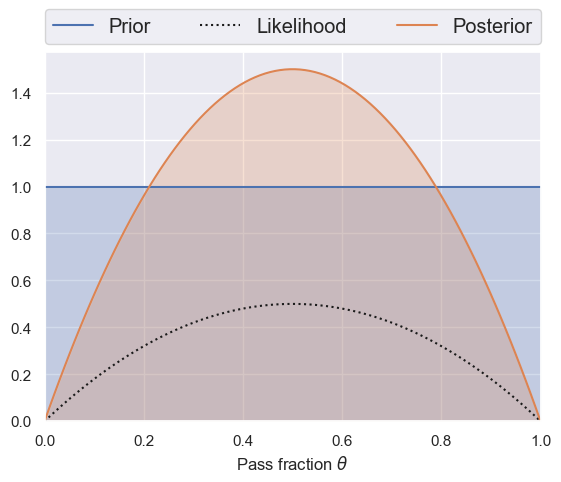

In [11]:
binomial_learn(1, 1, 2, 1)

 - The posterior peaks at the mean observed pass rate, 1/2, which is reasonable. It is very broad because we have only made two observations.

 - Values of 0 and 1 are absolutely ruled out, which makes sense since we have already observed 1 pass and 1 no pass.

 - The prior and posterior are probability densities normalized over $\theta$, so their area in the plot is 1. The likelihood is normalized over all possible data, so does not have area of 1 in this plot.

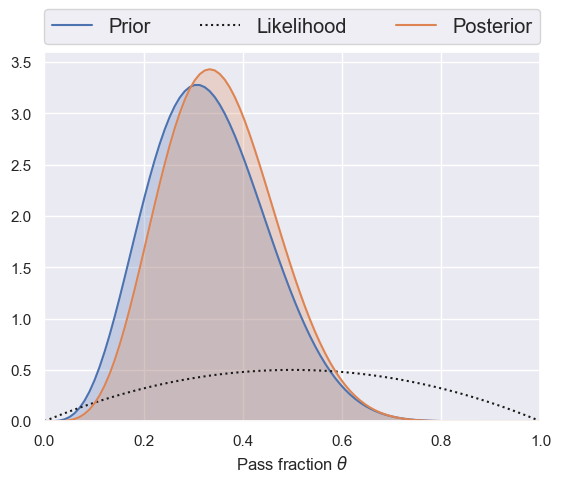

In [12]:
binomial_learn(5, 10, 2, 1)

 - The posterior now peaks away from the mean observed pass rate of 1/2.  This is reasonable if we believe our prior information since, with relatively uninformative data, Bayes' rule tells us that it should dominate our knowledge of $\theta$.  On the other hand, if we cannot justify why this prior is more believable than the earlier flat prior, then we must conclude that the value of $\theta$ is unknown and that our data has not helped.

 - If a previous experiment with 13 observations found 4 passing, then our new prior would be very reasonable. However, if this process has never been observed and we have no theoretical prejudice, then the original flat prior would be reasonable.

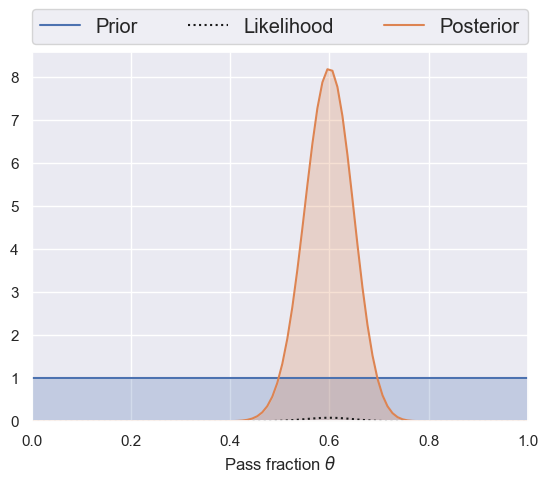

In [13]:
binomial_learn(1, 1, 100, 60)

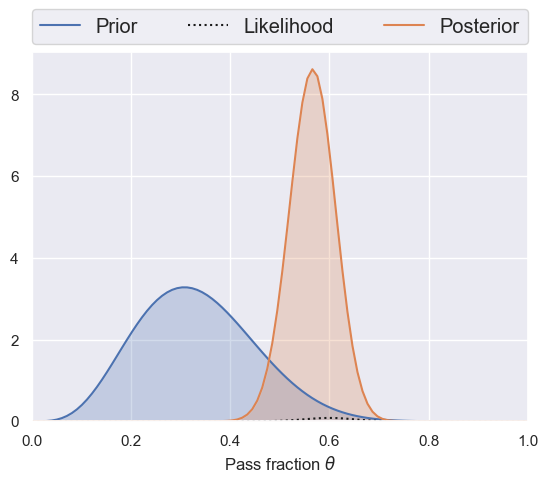

In [14]:
binomial_learn(5, 10, 100, 60)

 - With more data, the prior has much less influence. This is always the regime you want to be in.

 - The likelihood values are larger because there are many more possible outcomes (pass or not) with more observations, so any one outcome becomes relatively less likely. (Recall that the likelihood is normalized over data outcomes, not $\theta$).

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

You are hopefully convinced now that your choice of priors is mostly a non-issue, since inference with good data is relatively insensitive to your choice.  However, you still need to make a choice, so here are some practical guidelines:
 - A "missing" prior, $P(\Theta\mid M) = 1$, is still a prior but not necessarily a "natural" choice or a "safe default". It is often not even normalizable, although you can finesse this problem with good enough data.

 - The prior on a parameter you care about usually summarizes previous measurements, assuming that you trust them but you are doing a better experiment. In this case, your likelihood measures the information provided by your data alone, and the posterior provides the new "world average".

 - The prior on a __<span style="color:LightGreen">nuisance parameter</span>__ (which you need for technical reasons but are not interesting in measuring) should be set conservatively (restrict as little as possible, to minimize the influence on the posterior) and in different ways (compare posteriors with different priors to estimate systematic uncertainty).

 - If you really have no information on which to base a prior, learn about [uninformative priors](https://en.wikipedia.org/wiki/Prior_probability#Uninformative_priors), but don't be fooled by their apparent objectivity.

 - If being able to calculate your evidence integral analytically is especially important, look into [conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior), but don't be surprised if this forces you to adopt an oversimplified model. The binomial example above is one of the rare cases where this works out. 

 - Always state your priors (in your code, papers, talks, etc), even when they don't matter much.

## <span style="color:Orange">So, Why Isn't Everyone a Bayesian?</span>

The answer is more complicated than this, but two primary reasons are often cited:
1. The calculations needed for Bayesian statistics can be overwhelming for practical applications. However, this is becoming increasing manageable with modern computers. Also, the advent of numerical methods for approximate inference, especially <span style="color:violet">Markov chain Monte Carlo</span> (MCMC) the we will introduce in the next lecture, have tranformed probabilstic data inference. 

2. The structure requires a prior distribution (the "prior") on the parameter of interest. If you use a different
prior you will obtain different results and this “lack of objectivity” makes some people uncomfortable. However, we showed how some problems with sufficiant data can be relatively insensitive to choice of prior.

## <span style="color:Orange">Graphical Models</span>

We started above with the Bayesian joint probability:

$$ \Large
P(D, \Theta_M, M)
$$

When the individual data features, parameters and hyperparameters are all written out, this often ends up being a very high-dimensional function.

In the most general case, the joint probability requires a huge volume of data to estimate (recall our earlier discussion of [dimensionality reduction](Dimensionality.ipynb)). However, many problems can be (approximately) described by a joint probability that is simplified by assuming that some random variables are mutually independent. 

Graphical models are a convenient visualization of the assumed direct dependencies between random variables. For example, suppose we have two parameters $(\alpha, \beta)$ and no hyperparameters, then the joint probability $P(D, \alpha, \beta)$ can be expanded into a product of conditionals different ways using the rules of probability calculus, e.g.

$$ \Large
P(D, \alpha, \beta) = P(D,\beta\mid \alpha)\, P(\alpha) = P(D\mid \alpha,\beta)\, P(\beta\mid \alpha)\, P(\alpha) \; .
$$

or, equally well as,

$$ \Large
P(D, \alpha, \beta) = P(D,\alpha\mid \beta)\, P(\beta) = P(D\mid \alpha,\beta)\, P(\alpha\mid \beta)\, P(\beta) \; ,
$$

The corresponding diagrams are:

<div>
<img src="https://raw.githubusercontent.com/illinois-mlp/MachineLearningForPhysics/main/img/Bayes-fully_connected_1.png" width=400></img>
</div>

<div>
<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Bayes-fully_connected_2.png" width=400></img>
</div>

The way to read these diagrams is that a node labeled with $X$ represents a (multiplicative) factor $P(X\mid\ldots)$ in the joint probability, where $\ldots$ lists other nodes whose arrows feed into this node (in any order, thanks to probability calculus Rule-1). A shaded node indicates a random variable that is directly observed (i.e., data) while non-shaded nodes represent (unobserved) latent random variables.

These diagrams both describe a fully general joint probability with two parameters. The rules for building a fully general joint probability with any number of parameters are:
 - Pick an (arbitrary) ordering of the parameters.

 - The first parameter's node has arrows pointing to all other nodes (including the data).

 - The n-th parameter's node has arrows pointing to all later parameter nodes and the data.

With $n$ parameters, there are then $n!$ possible diagrams and the number of potential dependencies grows rapidly with $n$.

To mitigate this factorial growth, we seek pairs of random variables that should not depend on each other. For example, in the two parameter case:

<div>
<img src="https://raw.githubusercontent.com/illinois-mlp/MachineLearningForPhysics/main/img/Bayes-partial_1.png" width=400></img>
</div>

<div>
<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Bayes-partial_2.png" width=400></img>
</div>

Notice how each diagram tells a different story. For example, the first diagram tells us that the data can be predicted knowing only $\beta$, but that our prior knowledge of $\beta$ depends on $\alpha$. In effect, then, simplifying a joint probability involves drawing a diagram that tells a suitable story for your data and models.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXERCISE</span>___: Consider observing someone throwing a ball and measuring how far away it lands to infer the strength of gravity:
 - Our data is the measured range $r$.

 - Our parameters are the ball's initial speed $v$ and angle $\phi$, and the strength of gravity $g$.

 - Our hyperparameters are the ball's diameter $d$ and the wind speed $w$.
 
Draw one example of a fully general diagram of this inference's joint probability $P(r, v, \phi, g, d, w)$.

Suppose the thrower always throws as hard as they can, then adjusts the angle according to the wind. Draw a diagram to represent the direct dependencies in this simpler joint probability.

Write down the posterior we are interested in for this inference problem.

<div>
<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Bayes-projectile_fully_connected.png" width=400></img>
</div>

<div>
<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Bayes-projectile_story.png" width=400></img>
</div>

The posterior we are most likely interested in for this inference is

$$ \Large
P(g\mid r) \; ,
$$

but a more explicit posterior would be:

$$ \Large
P(g\mid r, v, \phi, d, w) \; .
$$

The difference between is these is that we marginalized over the "nuisance" parameters $v, \phi, d, w$ in the first case.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

The arrows in these diagrams define the direction of conditional dependencies. They often mirror a causal influence in the underlying physical system, but this is not necessary. Probabilistic diagrams with directed edges are known as ___<span style="color:violet">Bayesian networks</span>___ or ___<span style="color:violet">Belief Networks</span>___.

It is also possible to draw diagrams where nodes are connected symmetrically, without a specified direction. These are known as __<span style="color:LightGreen">Markov random fields</span>__ or __<span style="color:LightGreen">Markov networks</span>__ and appropriate when dependencies flow in both directions or in an unknown direction. You can read more about these [here](https://en.wikipedia.org/wiki/Markov_random_field).

## <span style="color:Orange">Acknowledgments</span>

* Initial version: Mark Neubauer

© Copyright 2025